Katherine Flores- Lab 3 Chapter 4

1) 4.35

stat=3.586, p=0.053
Probably the same distribution
3.5856269113149866 0.05336512592803552


/tmp/ipython-input-1691356455.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data,


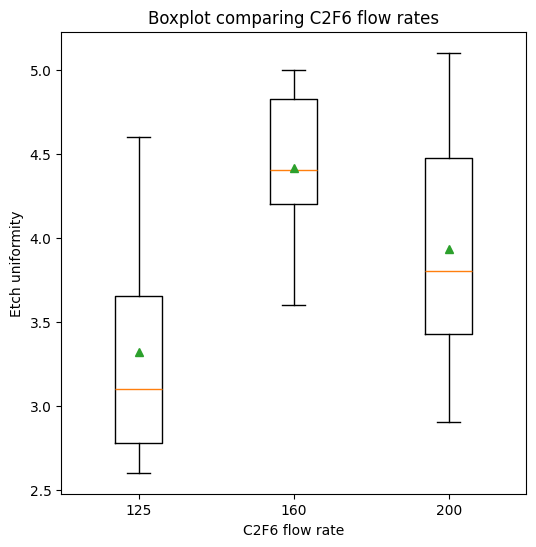

0      0.731
1    -13.328
2    -11.958
3      3.137
4     11.556
5     10.892
6      2.214
7     -0.125
8     -2.907
9      2.874
10     0.874
11    -3.960
dtype: float64


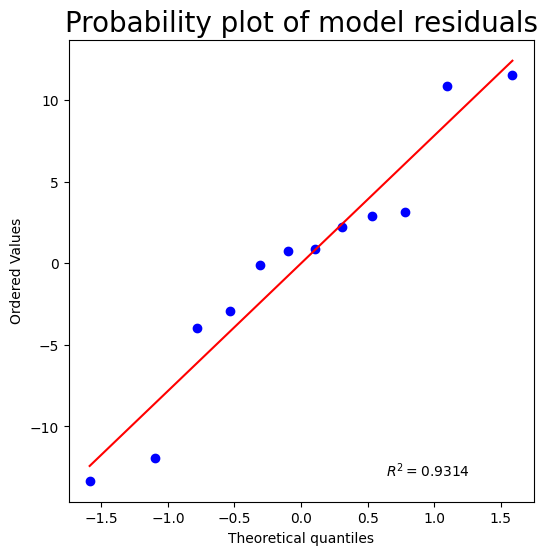

Standard Error (SE): 0.325


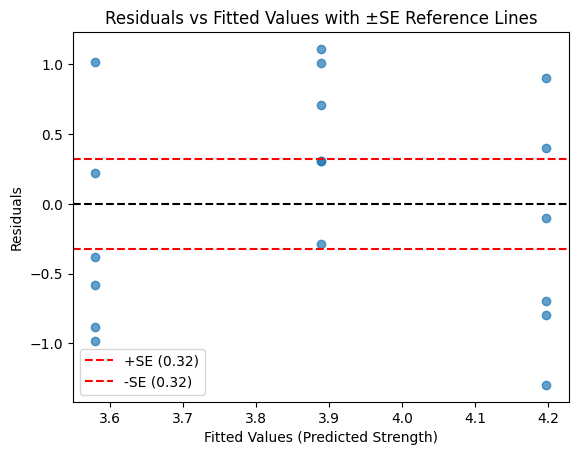

In [9]:
#a) Does flow rate affect etch uniformity? Answer this question by analysis of variance with alpha=0.05
from scipy.stats import f_oneway
data1 = [2.7,2.6,4.6,3.2,3.0,3.8]
data2 = [4.6,4.9,5.0,4.2,3.6,4.2]
data3 = [4.6,2.9,3.4,3.5,4.1,5.1]

stat, p = f_oneway(data1,data2,data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#Takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(data1, data2, data3)
print(fvalue, pvalue)

import statsmodels.api as sm
from statsmodels.formula.api import ols


# b) Construct a box plot of the etch uniformity data.

# BOX PLOT
fig = plt.figure(figsize= (6, 6))
ax = fig.add_subplot(111)


data=[data1, data2, data3]

ax.boxplot(data,
           labels= ['125', '160', '200'],
           showmeans= True)

plt.title("Boxplot comparing C2F6 flow rates")
plt.xlabel("C2F6 flow rate")
plt.ylabel("Etch uniformity")
plt.show()




#
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

model.rsquared
model.rsquared_adj
residuals = model.resid
print(residuals.round(3))

# Generate the probability plot
normality_plot, stat = stats.probplot(model.resid, plot=ax, rvalue=True)

# Set the title
ax.set_title("Probability plot of model residuals", fontsize=20)

# Show the plot
plt.show()



#plot the residuals versus predicted C2F6 flow. Interpret this plot.

# Residuals and fitted values from your model
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt


flow1 = [5] * len(data1)
flow2 = [10] * len(data2)
flow3 = [15] * len(data3)

# Dataset
flow = flow1 + flow2 + flow3
response = data1 + data2 + data3

# Dataframe
df = pd.DataFrame({'Flow': flow, 'Response': response})

# Fit a linear model
X = df['Flow']
y = df['Response']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# --- Standard Error (SE) ---
n = len(df[df['Flow'] == 5])
se = np.sqrt(model.mse_resid / n)
print(f"Standard Error (SE): {se:.3f}")

# --- Residuals vs Fitted plot ---
residuals = model.resid
fitted_values = model.fittedvalues

plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(0, color="black", linestyle="--")   # center line
plt.axhline(+se, color="red", linestyle="--", label=f"+SE ({se:.2f})")
plt.axhline(-se, color="red", linestyle="--", label=f"-SE ({se:.2f})")

plt.xlabel("Fitted Values (Predicted Strength)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values with ±SE Reference Lines")
plt.legend()
plt.show()


1) 4.35
a) Our statistic is 3.586 which is small and could mean the differences among sample means could just be due to random variation. And our p value is bigger than 0.05 so we fail to reject the null hypothesis of all group means being equal.

b)  Data 1 (125) has the lowest mean based on the box plot. Based on the ANOVA,
    these are all likely to have the same distirbution so we cant say one has
    less variability (ideal) than the other.

c and d)  based on the qq plot, the normality seems reasonable for this ANOVA model.
The points follow the line for the most part and the residuals form the model
follow a normal pattern no matter which flow rate. This justifies my ANOVA
results, that they probably follow a normal distribution. R^2= 0.9706 which is acceptable it means the residuals are close to normal but still deviations. The chart measures how well the points align with the straight normal line. R=correlation coefficient.

Based on the residuals vs predicted C2F6 flow, I dont think 68% of the data falls inside the red standard error band. I believe because the sample size is very small, it seems more varied and this is caused by sampling variation.




2) Question 4.36

In [10]:
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

data1 = [2.7, 2.6, 4.6, 3.2, 3.0, 3.8]
data2 = [4.6, 4.9, 5.0, 4.2, 3.6, 4.2]
data3 = [4.6, 2.9, 3.4, 3.5, 4.1, 5.1]

from statsmodels.stats.multicomp import MultiComparison

comp = MultiComparison(df['Response'], df['Flow'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     5     10      1.1 0.0435  0.0304 2.1696   True
     5     15   0.6167 0.3199 -0.4529 1.6862  False
    10     15  -0.4833  0.486 -1.5529 0.5862  False
---------------------------------------------------


2) 4.36) The null hypothesis is that ui=uj i the tukey HSD, and we are only rejecting when comparing mu of data 1 and data 2. So this means the mean etch uniformity is not the same for group 1(125) and 2(160). We can conclude etch uniformity increases when flow rate increases from 125 to 160.  Flow rate 160 produce different results.

b)4.53

In [11]:
from scipy.stats import norm

smean = 31.400
mu_0 = 30.0
semean = 0.336

#z score
z = (smean - mu_0) / semean

#Ttwo-tailed p-value
p_value = 2 * norm.sf(abs(z))

print(f"Z-score: {z:.3f}")
print(f"P-value: {p_value:.6f}")


#c)
CV = 1.96  # critical value for 95% confidence from normal table

# Calculate confidence interval
ci_lower = smean - CV * semean
ci_upper = smean + CV * semean

# Display results
print(f"95% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")

#d)
import math

sd = 1.3
n = 15

semean = sd / math.sqrt(n)
print(f"Standard Error of the Mean: {semean:.3f}")

#e)
from scipy.stats import norm

z = 4.167
p_value = norm.sf(z)  # one-tailed p-value

print(f"One-tailed P-value: {p_value:.6f}")

Z-score: 4.167
P-value: 0.000031
95% Confidence Interval: (30.741, 32.059)
Standard Error of the Mean: 0.336
One-tailed P-value: 0.000015


a)I go the z score using the formula (mean - hypothesized mean) all divided by standard error. The z score means how far the sample mean is from the hypothesized population mean (30). The p value tells the probability of getting a result as extreme as the sample mean if the null hypothesis is true. And then I found the p value by plugging the given variables into the formula and the p value shows as 0.000031, so there is a very very small chance of seeing a result that extreme if the mean were truly 30.

b) Two sided test because we are asking equal to or NOT EQUAL to

c) (30.741,32059), looked up critical value for 95% confidence interval manually

d) The standard error is telling me how much variability there is in the sample mean (30). the 0.336 is a good SE mean because it is not greater than 1.

e) Manually putting in the p value for a one tailed, and we already had the calculated the z score so I plugged that in. The p value is very low so we reject the null hypothesis and conclude mu is bigger than 30.

c) 4.47

In [12]:
import pandas as pd
import statsmodels.api as sm

#Data
data = pd.DataFrame({
    'bhp': [225,212,229,222,219,278,246,237,233,224,223,230],
    'rpm': [2000,1800,2400,1900,1600,2500,3000,3200,2800,3400,1800,2500],
    'octane': [90,94,88,91,86,96,94,90,88,86,90,89],
    'compression': [100,95,110,96,100,110,98,100,105,97,100,104]
})

#Defineing independent and dependent variables
X = data[['rpm', 'octane', 'compression']]
y = data['bhp']

#Constant for intercept
X = sm.add_constant(X)

#Fit the regression model
model = sm.OLS(y, X).fit()

#Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bhp   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Fri, 26 Sep 2025   Prob (F-statistic):            0.00317
Time:                        01:00:08   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -266.0312     92.674     -2.871      

b) Based on the p value
(0.00317< 0.05) we can reject the null hypothesis and conclude at least one of these variables contributes significantly.
c) All of the p values in below analysis are below 0.05, yes all 3 regressor variables in the model are needed.